## Import TensorFlow and other libraries

It's good practice to use a validation split when developing your model. Let's use 80% of the images for training, and 20% for validation.

Class Names: ['CDM', 'HT', 'MDMV', 'NCLB', 'SCLB', 'SCMV', 'SR']


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,447,144 (24.59 MB)

 Trainable params: 6,447,143 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1 (8.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Prediction results for the images:
            CDM            HT          MDMV          NCLB          SCLB  \
0  9.997434e-01  1.204483e-06  7.796462e-07  3.311647e-08  5.491626e-05   
1  6.298190e-17  1.000000e+00  2.441722e-24  4.563736e-10  1.026450e-18   
2  1.436640e-09  1.073168e-06  9.999989e-01  6.014099e-11  3.147807e-08   
3  5.325867e-13  1.451353e-06  4.661258e-15  9.999976e-01  4.511429e-08   
4  6.523594e-14  4.227656e-12  2.592493e-14  1.064285e-08  9.999996e-01   
5  1.557980e-08  2.423662e-15  1.449284e-06  2.578191e-16  7.503779e-14   
6  5.842200e-14  3.184856e-09  2.897770e-17  7.037409e-06  3.244497e-08   

           SCMV            SR  
0  1.995441e-04  3.853736e-09  
1  7.432411e-18  7.382547e-23  
2  5.201573e-11  5.278440e-15  
3  5.756654e-07  2.925323e-07  
4  2.918046e-07  2.535161e-08  
5  9.999986e-01  6.061021e-23  
6  4.694747e-12  9.999930e-01  

Image 1:
True Label: CDM
Predicted Label: CDM
Prediction Confidence: 

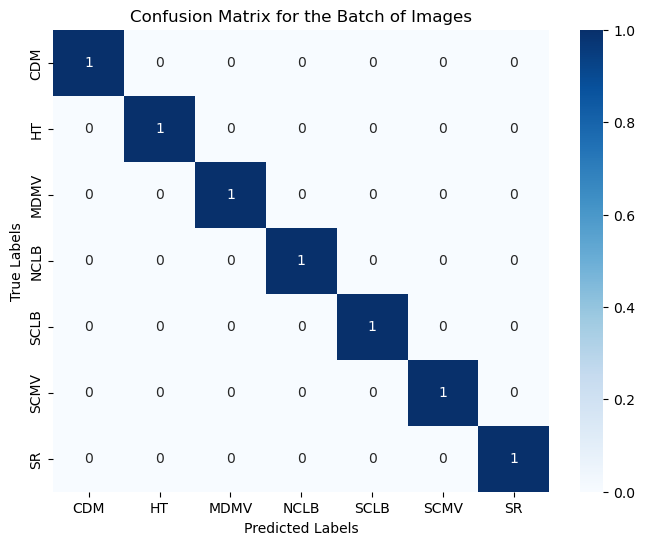

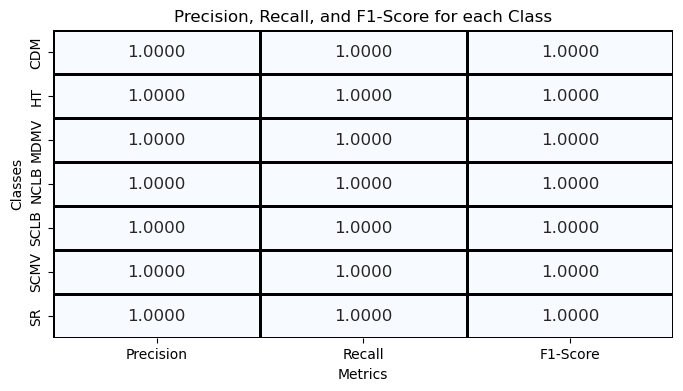

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing import image
import os
import random

#----------------------------------------------------------------------------------------------------------------
batch_size = 7  # Load 7 images at a time
img_height = 224
img_width = 224
#----------------------------------------------------------------------------------------------------------------
# Paths to your directories (not individual files)
img_paths = [
    "D:/CNN-With/data/CDM",
    "D:/CNN-With/data/HT",
    "D:/CNN-With/data/MDMV",
    "D:/CNN-With/data/NCLB",
    "D:/CNN-With/data/SCLB",
    "D:/CNN-With/data/SCMV",
    "D:/CNN-With/data/SR"
]

# Load and preprocess images by selecting 1 random image per directory
images = []
for path in img_paths:
    # List all files in the directory and shuffle them
    files = os.listdir(path)
    random.shuffle(files)
    
    # Pick the first random file from the directory
    selected_file = files[0]  # Modify this to select other files if you wish
    img_path = os.path.join(path, selected_file)
    
    # Load and preprocess the selected image
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)  # Convert to numpy array
    images.append(img_array)

# Convert the list of images to a numpy array
images = np.array(images)

# Add batch dimension (batch_size, height, width, channels)
# Images are already in the right shape (7, 224, 224, 3), no need to expand dimensions

# Normalize the images (if the model requires it, adjust as needed)
# images = images / 255.0  # Uncomment if model was trained with normalized images

#----------------------------------------------------------------------------------------------------------------
class_names = ['CDM', 'HT', 'MDMV', 'NCLB', 'SCLB', 'SCMV', 'SR']  # Class names for the images
print("Class Names:", class_names)
#----------------------------------------------------------------------------------------------------------------

# Define the path where the model is saved (in H5 format)
saved_model_path = "D:/CNN-With/Trained_Model_Cnn/model.h5"

# Load the model
model = tf.keras.models.load_model(saved_model_path)

# Print the model summary
model.summary()
#----------------------------------------------------------------------------------------------------------------

# Predict using the loaded model
predictions = model.predict(images)

# If the model has logits as output, apply softmax
if 'from_logits' in model.loss.get_config() and model.loss.get_config()['from_logits']:
    predictions = tf.nn.softmax(predictions).numpy()

# Create a DataFrame to show the prediction probabilities for all images
pred_df = pd.DataFrame(predictions, columns=class_names)

# Display the prediction results for all images
print("Prediction results for the images:")
print(pred_df)

# Assuming true labels for the images (replace with actual labels)
true_labels = ["CDM", "HT", "MDMV", "NCLB", "SCLB", "SCMV", "SR"]  # Replace with actual labels
predicted_labels = pred_df.idxmax(axis=1).tolist()  # Get the predicted label for each image
confidences = pred_df.max(axis=1).tolist()  # Get the confidence of each prediction

# Print the true labels, predicted labels, and their respective confidence
for i in range(batch_size):
    print(f"\nImage {i+1}:")
    print(f"True Label: {true_labels[i]}")
    print(f"Predicted Label: {predicted_labels[i]}")
    print(f"Prediction Confidence: {confidences[i]:.4f}")

#----------------------------------------------------------------------------------------------------------------
# Create confusion matrix for the batch
cm = confusion_matrix(true_labels, predicted_labels, labels=class_names)

# Convert confusion matrix to DataFrame for better readability
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

# Print the confusion matrix
print("Confusion Matrix for the batch:\n")
print(cm_df)

# Calculate Precision, Recall, and F1-Score for the batch
precision = precision_score(true_labels, predicted_labels, average=None, labels=class_names)
recall = recall_score(true_labels, predicted_labels, average=None, labels=class_names)
f1 = f1_score(true_labels, predicted_labels, average=None, labels=class_names)

# Display metrics
metrics_df = pd.DataFrame({
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}, index=class_names)

print("\nPrecision, Recall, and F1-Score for each class:")
print(metrics_df)

# Optionally, calculate average precision, recall, and F1-Score for the batch
average_precision = precision_score(true_labels, predicted_labels, average='macro')
average_recall = recall_score(true_labels, predicted_labels, average='macro')
average_f1 = f1_score(true_labels, predicted_labels, average='macro')

print(f"\nAverage Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Average F1-Score: {average_f1:.4f}")

#----------------------------------------------------------------------------------------------------------------
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for the Batch of Images')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plotting the metrics table as a heatmap (similar to confusion matrix)
plt.figure(figsize=(8, 4))
sns.heatmap(metrics_df, annot=True, fmt='.4f', cmap='Blues', cbar=False, annot_kws={"size": 12},
            xticklabels=metrics_df.columns, yticklabels=metrics_df.index, linewidths=1, linecolor='black')
plt.title("Precision, Recall, and F1-Score for each Class")
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()